## Задача 10.3 б) (2 задание)

In [2]:
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline
plt.rc('font', **{'size' : 22})


Решаем уравнение теплопроводности: $u_t = u_{xx} + f(x,t)$

На $\textbf{G} = [0,1]\times(0,\infty)$

Где: 
1) $f(x,t) = \pi^2sin(\pi x)$
2) $u(0,t) = 0$ $\forall t > 0$
3) $u(1,t) = 0$ $\forall t > 0$
4) $u(x,0) = 0$ $\forall x \in (0,1)$

Классическим методом Рунге-Кутты четвертого порядка аппроксимации.

A: Измельчая дважды пространственную сетку , определяем порядок сходимости (сравниваем с теоретическим)

B: Методом разделения переменных находим точное решение, сравниваем с численным.



## A:

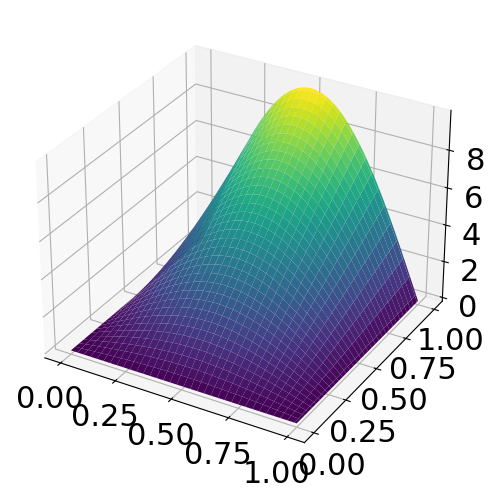

In [3]:
def wave_equation(f, x_range, t_range, nx, nt):
    x_min, x_max = x_range
    t_min, t_max = t_range
    dx = (x_max - x_min) / (nx - 1)
    dt = (t_max - t_min) / (nt - 1)

    x = np.linspace(x_min, x_max, nx)
    t = np.linspace(t_min, t_max, nt)

    u = np.zeros((nx, nt))

    u[:, 0] = 0
    u[0,:] = 0 
    u[1,:] = 0

    for n in range(0, nt - 1):
        k1 = dt * f(x, t[n], u[:, n])
        k2 = dt * f(x, t[n] + dt/2, u[:, n] + k1/2)
        k3 = dt * f(x, t[n] + dt/2, u[:, n] + k2/2)
        k4 = dt * f(x, t[n] + dt, u[:, n] + k3)
        u[:, n+1] = u[:, n] + (k1 + 2*k2 + 2*k3 + k4) / 6

    return x, t, u

def f(x, t, u):
    return np.pi**2 * np.sin(np.pi * x)

x_range = (0, 1)  # Интервал по x: [0, 1]
t_range = (0, 1)  # Интервал по t: [0, 1]
nx = 101  # Число точек по x
nt = 101  # Число точек по t

x, t, u = wave_equation(f, x_range, t_range, nx, nt)


X, T = np.meshgrid(x, t)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, T, u.T, cmap="viridis")

plt.show()

## В: $u = t\pi^2sin(\pi x)$

Реальное решение

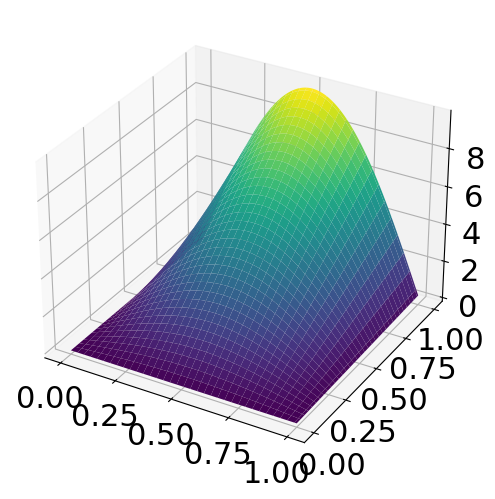

In [4]:
W = np.zeros((len(x),len(t)))

for i in range(len(x)) :
    for j in range(len(t)) :
        x_0 = i/len(x)
        t_0 = j/len(t)
        W[i][j] = np.sin(np.pi*x_0)*np.pi**2*t_0

X, T = np.meshgrid(x, t)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(T,X, W, cmap="viridis")

plt.show()

In [5]:
def get_W(x,t):
    W = np.zeros((len(x),len(t)))

    for i in range(len(x)) :
        for j in range(len(t)) :
            x_0 = i/len(x)
            t_0 = j/len(t)
            W[i][j] = np.sin(np.pi*x_0)*np.pi**2*t_0
    return W

Экспериментально : сходимость линейная по h : $|| f - f_h ||_{C} \leq M*h^1$

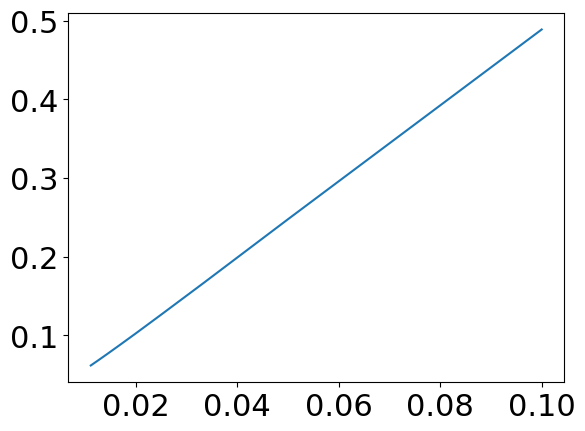

In [8]:
nx_array = np.arange(10,100,10)

err = []
for nx in nx_array :
    x1, t1, u1 = wave_equation(f, x_range, t_range, nx, nt)
    w1 = get_W(x1,t1)
    err.append(np.sum(np.abs(u1-w1))/nx/nt)
plt.plot(1/nx_array , err)
plt.show()